In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("./subroutines")
from GAMcalc import *  # Code for calculating vertex functions
import propagator  # propagator object used to store pre-calculated values
import wignerD as wd # wigner D object used to store pre-calculated values

Di-block copolymers are a type of polymer made when a sequence of one monomer type is bonded covalently to a sequence of another monomer type. 
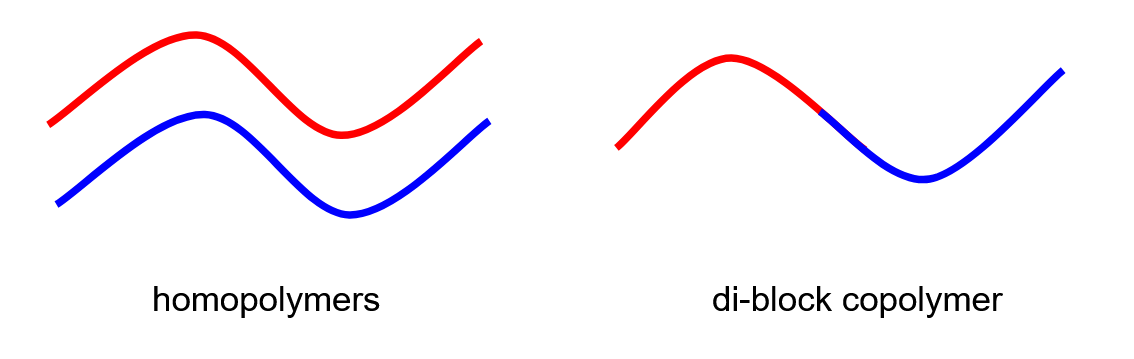
Under specific conditions, these copolymers can form a variety of "microphases", including lamellar, cylindrical, and spherical domains. 
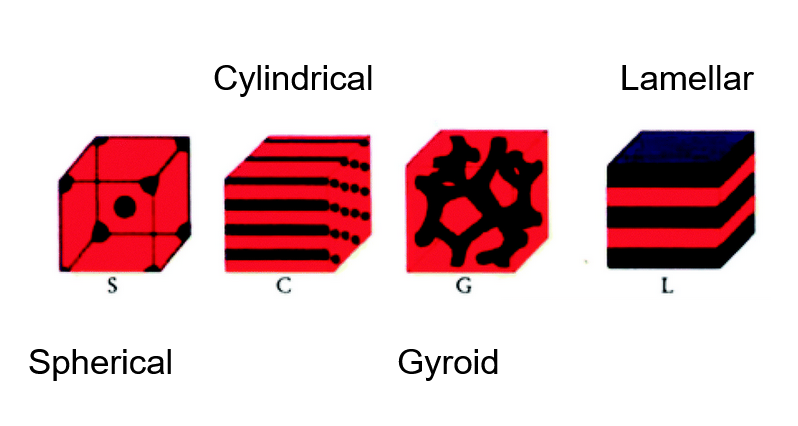
Which microphase forms depends on three parameters: the block size f_A, the degree of polymerization N, and the Flory-Huggins interaction parameter chi. 

The block size f_A is the ratio of "A" type monomers over the total number of monomers in the polymer.

The degree of polymerization is the number of monomers per polymer. 

The Flory-Huggins interaction parameter describes the magnitude and unfavorability of the different monomer interactions. With these three parameters, phase diagrams can be created.


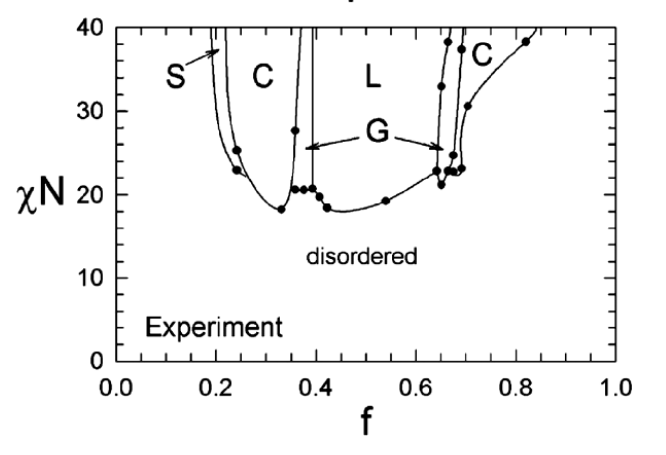

These diagrams are useful, but for many applications (lithography, purification membranes) the lengthscale of the microstructure features is important. Is it possible to predict the characteristic lengthscale of these structures, depending on those same three parameters?

One starting point is to use expressions for the free energy of each phase. Using self-consistent field theory (SCFT), we are able to create expressions for the free energy of each phase of interest. By comparing the magnitude of the energies, we can determine the equilibrium phase in different conditions, leading to a highly accurate theoretical phase diagram
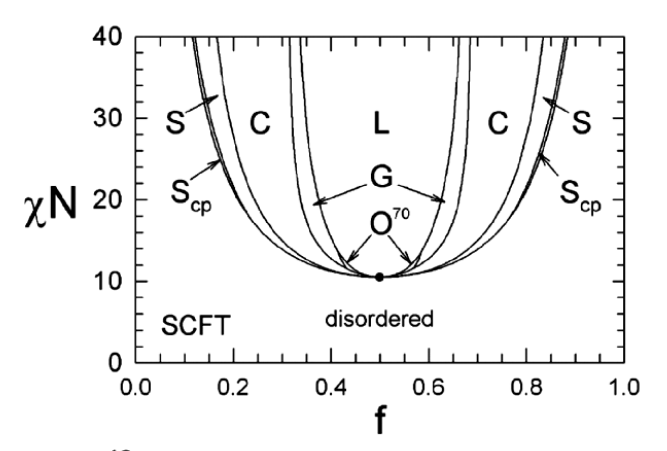

We study the thermodynamics in these systems by expanding the free energy of each phase in terms of an order parameter psi. The order parameter describes how the density of one monomer deviates from the average value for a particular phase. F_0 is the free energy of the disordered phase, where the density of both monomers are equal throughout the system. Here I am showing the expansion up to quadratic order for a generic order parameter
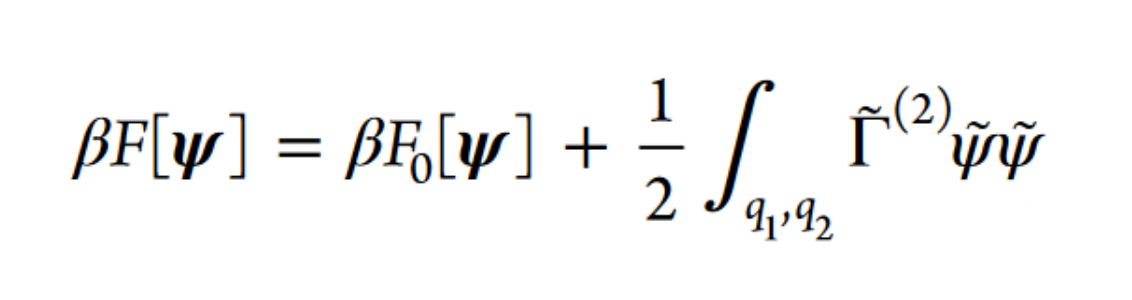

By using the random phase approximation, it can be shown that the coefficient gamma2 is related to the density-density correlation function of the polymer ensemble (Macromolecules 1980, 13, 6, 1602–1617).

This fact leads to the specific question I want to investigate: can we predict the lengthscale of different microphase structures based on its free energy, specifically the gamma coefficient?

We can begin by studying a diblock co polymer melt, where each polymer is made of 10 Kuhn segments, half of which are of monomer A, half are monomer B, and at a very high temeprature, so that the chi parameter approaches 0.

Using a code base provided by the Spakowitz Group https://web.stanford.edu/~ajspakow/data_and_code/data_and_code.html

we can evaluate the gamma2 coefficient for a range of wave vectors K 

In [74]:
N = 10 # Number of Khun lengths
FA = 0.5 # Fraction A type monomer
CHI = 0 # Flory huggnes chi parameter, ~ 1/T

pset=propagator.prop_set(nlam=10)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j)) 
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI) #evaluates the gamma2 coefficient for a specific wavevector, stores in gam2

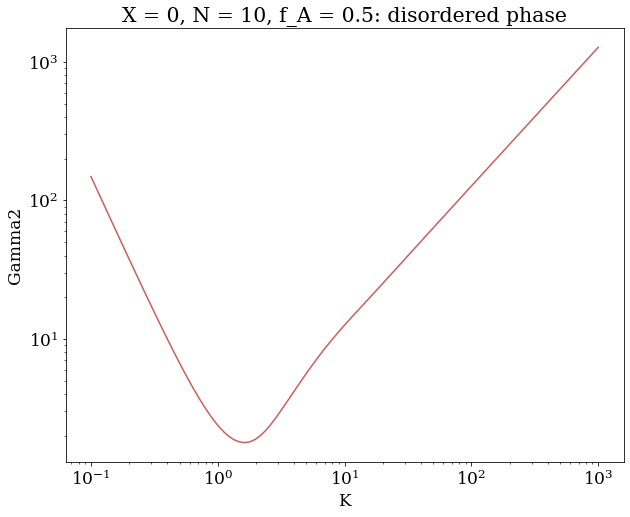

In [76]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 17}
plt.rc('font', **font)
plt.loglog(KV, gam2.real, color = "indianred")
plt.xlabel('K')
plt.ylabel('Gamma2')
plt.title("X = 0, N = 10, f_A = 0.5: disordered phase")
plt.show()

We can see that, for this set of parameters, this gamma coefficient is always positive; by definniton, the order parameter as well is positive.  This means the free energy of any ordered microstructure will be higher than the free energy of the disordered state at these conditions. This is consistent with the phase diagrams shown above. 

Lets now try a higher chi value

In [78]:
N = 10 # Number of Khun lengths
FA = 0.5 # Fraction A type monomer
CHI = 1.5 # Flory huggnes chi parameter, ~ 1/T

pset=propagator.prop_set(nlam=10)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j)) 
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI) #evaluates the gamma2 coefficient for a specific wavevector, stores in gam2

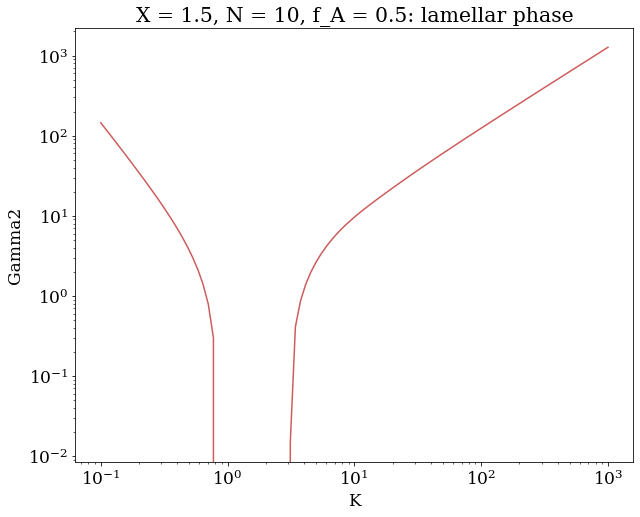

In [79]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 17}
plt.rc('font', **font)
plt.loglog(KV, gam2.real, color = "indianred")
plt.xlabel('K')
plt.ylabel('Gamma2')
plt.title("X = 1.5, N = 10, f_A = 0.5: lamellar phase")
plt.show()

We now see negative gamma values, which indicates that an ordered microstructure is favored to form. Based on the phase diagram, it is a lamellar phase (f_A = 0.5, X*N = 15)

It can also be shown that gamma2 is proportional to the inverse of the density-density correlation function. So, the minimum value of gamma2 indicates the lengthscale of greatest fluctuation. (More rigorously, it is the minimum eigenvalue of the gamma2 matrices which indicates q*).

In [26]:
q_star = np.abs(min(gam2.real)[0])

In [27]:
q_star

1.2142151014779254

We can now use this lengthscale of greatest fluctuation to find a wavelength of the lamellae. By definiton, q = 2*pi/lambda

In [30]:
lam = 2*np.pi/q_star

In [31]:
lam

5.174688817106444

We now have a prediction for the wavelength of the lamellae, where we only considered the most significant density fluctuation. 

Now lets do a fourier analysis on a true lamellar structure of that wavelength, and see how the fourier components of the full structure compare to our "most significant" fluctuation

In [32]:
N = 60
L = lam
dx = L/N
x = np.linspace(0, L, N)

def lamellar(x, lam):
    result = np.zeros(len(x))
    for i in range(len(x)):
        if 0 < x[i] < (lam/2.):
            result[i] = 1
        elif x[i] == (lam/2.):
            result[i] = 0.5
        elif (lam/2.) < x[i] < lam:
            result[i] = 0
    return result

f = lamellar(x, lam)

Text(0, 0.5, 'monomer A volume fraction')

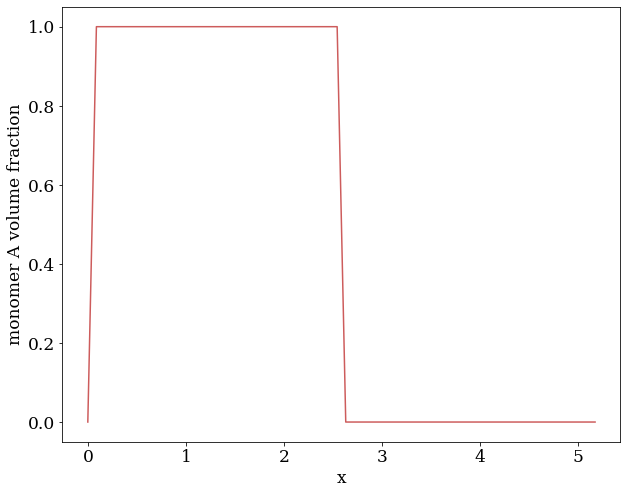

In [72]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 17}
plt.rc('font', **font)
plt.plot(x, f, color = "indianred")
plt.xlabel("x")
plt.ylabel("monomer A volume fraction")

In [50]:
k = np.fft.fftfreq(N, d=dx) *2*np.pi

In [39]:
ft = np.fft.ifft(f)

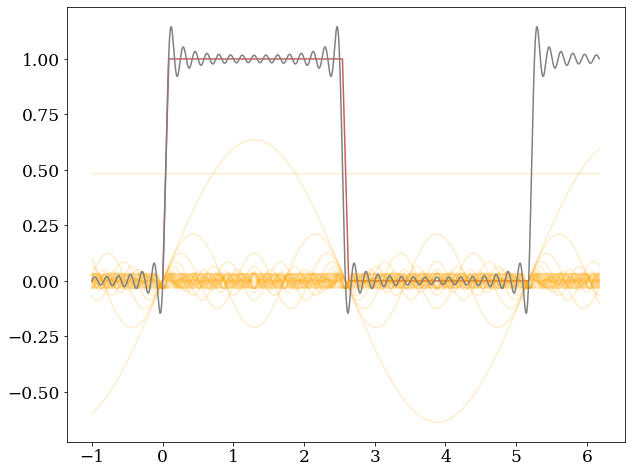

In [80]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 17}
plt.rc('font', **font)
#original function
plt.plot(x, f, color = "indianred")

#Sum of wave components
N = len(x)
xt = np.linspace(-1, L+1, N*30)
zt = np.zeros(N*30, "complex")
for i in range(0, N//2+1):
    j = i
    jm = -i
    z = ft[j]*np.exp(-1j*k[j]*xt)
    if (j>0):
        z += ft[jm]*np.exp(-1j*k[jm]*xt)
    zt += z
    plt.plot(xt, np.real(z), alpha=0.2, color = "orange") #plotting the wave contribution
    
plt.plot(xt, np.real(zt), color = "grey") #plotting the sum

Lets now isolate the component that contributes the most

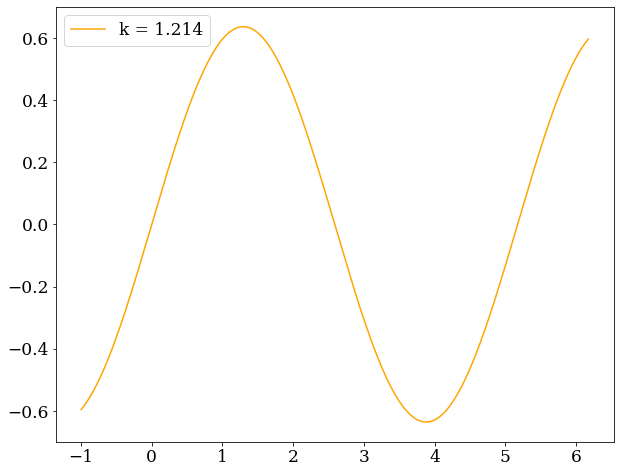

In [85]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 17}
plt.rc('font', **font)
z1 = ft[1]*np.exp(-1j*k[1]*xt) + ft[-1]*np.exp(-1j*k[-1]*xt)
plt.plot(xt, np.real(z1), color = "orange", label = "k = 1.214")
plt.legend()
#This is the main contribution to to the foureir represetnation of the order parameter. 

In [54]:
k[1]

1.2142151014779254

In [64]:
k[1] == q_star

True

Great- the wavecetor we find from the gamma2 analysis is in fact the most significant fourier component, and so we are able to find the wavelength of the lamellar structure!

# Individual meeting 3/8

For diblock copolmyer melt, want to calculate the quadratic order free energy for the lamellar and cylindrical phases.

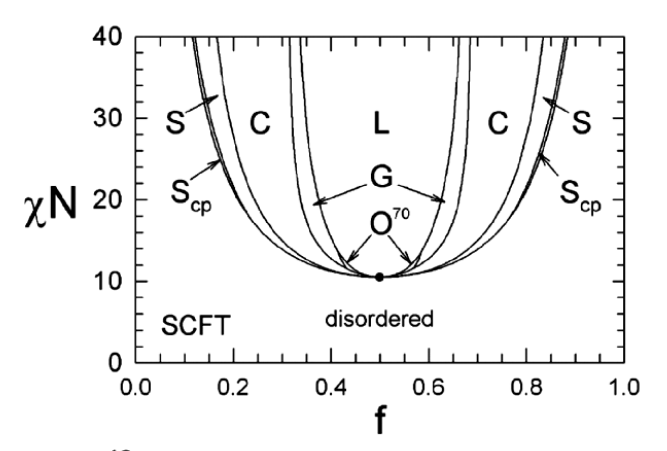

In [78]:
N = 10 # Number of Khun lengths
FA = 0.5 # Fraction A type monomer
CHI = 1.5 # Flory huggnes chi parameter, ~ 1/T

pset=propagator.prop_set(nlam=10)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j)) 
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI) #evaluates the gamma2 coefficient for a specific wavevector, stores in gam2

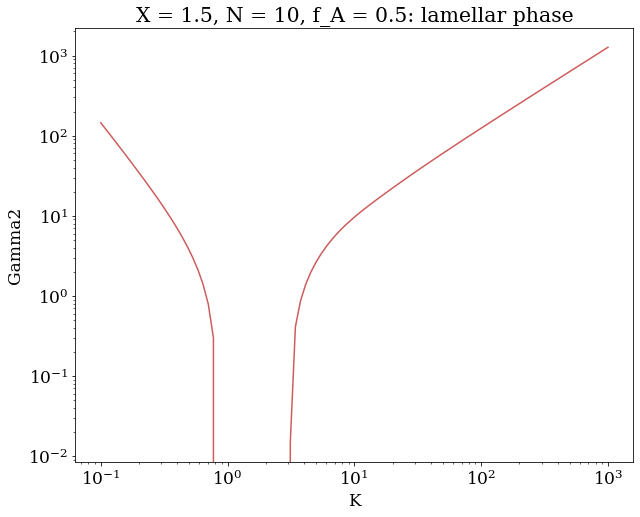

In [79]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 17}
plt.rc('font', **font)
plt.loglog(KV, gam2.real, color = "indianred")
plt.xlabel('K')
plt.ylabel('Gamma2')
plt.title("X = 1.5, N = 10, f_A = 0.5: lamellar phase")
plt.show()

We now see negative gamma values, which indicates that an ordered microstructure is favored to form. Based on the phase diagram, it is a lamellar phase (f_A = 0.5, X*N = 15)

It can also be shown that gamma2 is proportional to the inverse of the density-density correlation function. So, the minimum value of gamma2 indicates the lengthscale of greatest fluctuation. (More rigorously, it is the minimum eigenvalue of the gamma2 matrices which indicates q*. But since the gamma2 coefficients are not matrices, the eigne values are the gamma2 values themselves).

In [26]:
q_star = np.abs(min(gam2.real)[0])

In [27]:
q_star

1.2142151014779254

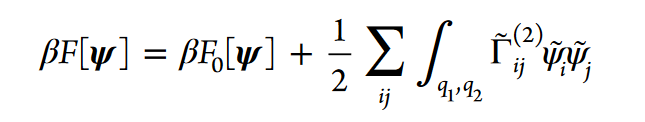

for a melt, only have one order parameter

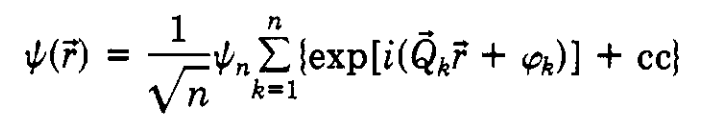

## lamellar

Assuming a singe wave mode to describe lamellar phase order parameter, find that the fourier transform of psi is a delta function
 
(for lamellar, n = 1 -> single wave)

So we just evaluate the gamma matrix at q* 

In [89]:
g2 = gamma2(pset, N, FA, q_star, CHI)
lam_quad = 0.5*g2
lam_quad

(-1.2076253944524624-2.7615668567989084e-17j)

So we find the free energy of the lamellar phase at these conditions is  F = F_0 - 1.207 * a

### how to choose a? and phase? Leibler-> minimize wrt both. But could make "a" arbitrarily big, and will therefore make F arbitrarily small

### for 3 component system: how is the double integral over the product of two identical delta functions different than a single integral? (only different in amplitude?)

## cylindrical

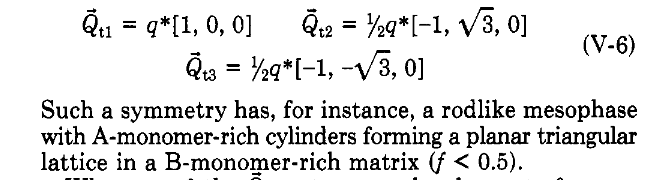

In [109]:
Q1 = q_star*np.array([1,0,0])
Q2= 0.5*q_star*np.array([-1, np.sqrt(3), 0])
Q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
q_array = [Q1, Q2, Q3]

g_sum = 0
phase = 0
for q in q_array:
    q_mag = np.linalg.norm(q)
    g_q = gamma2(pset, N, FA, q_mag, CHI)
    g_sum += g_q * np.exp(2*phase)

cyl_quad = 0.5 * g_sum * (1/np.sqrt(3))

In [110]:
cyl_quad

(-2.091668539702072-4.783174104473996e-17j)

## predicting cylindrical is more stable- incorrect!

Qs: 


why does 2pi/q* give domain spacing -> by definitnon of wavevector


why do eigenvalues give inverse of fluctuation magnitude- can show that the average density-density fluctuations = inverse of gamma value, which is the eigenvalue for a 1X1 matrix. SO eigenvalue is related to the inverse of fluctuation magnitude. 

calc free E value

In [135]:
N = 10 # Number of Khun lengths
FA = 0.5 # Fraction A type
#K = 10 # Magnitude of K vector
CHI = 3 # Flory huggnes chi parameter

pset=propagator.prop_set(nlam=10)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI)

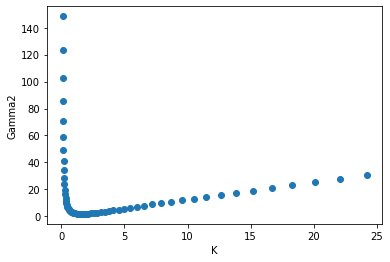

In [145]:
plt.scatter(KV[:60], gam2.real[:60])
plt.xlabel('K')
plt.ylabel('Gamma2')
plt.show()

In [15]:
q_star = np.abs(min(gam2.real)[0]) #these are scalars, so eigenvalue is the matrix element (val of gamma is the eigenvalue)
#smallest eigenvalue means largest fluctuation- can take this large fluctuation to be the most important one